In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
with open('cleaned_df.pickle', 'rb') as file:
    df = pickle.load(file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null int64
view             21420 non-null int64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
has_basement     21420 non-null int64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.6 MB


In [5]:
with open('regression_model1.pickle', 'rb') as file:
    model = pickle.load(file)

In [34]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.698      
Dependent Variable:       price                AIC:                    584168.0720
Date:                     2020-07-26 22:58     BIC:                    584311.5695
No. Observations:         21420                Log-Likelihood:         -2.9207e+05
Df Model:                 17                   F-statistic:            2916.      
Df Residuals:             21402                Prob (F-statistic):     0.00       
R-squared:                0.698                Scale:                  4.0858e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
----------------------------------------------------------------------------------
Intercept     6294512.8114 2957758.3622   2.1281 0.0333  497085.0802 12091940.5426
bedrooms       -36721.6396    1919.6526 -19.1293 0.0000  -40484.3024   -32958.9769
bathrooms       42031.3622    3291.7135  12.7688 0.0000   35579.3574    48483.3669
sqft_living       152.2525       4.4242  34.4133 0.0000     143.5806      160.9243
sqft_lot            0.1345       0.0482   2.7925 0.0052       0.0401        0.2289
floors           8025.1755    3624.8248   2.2139 0.0268     920.2476    15130.1035
waterfront     699096.8144   17418.4013  40.1355 0.0000  664955.4444   733238.1844
view           116361.6821    5237.5382  22.2169 0.0000  106095.7153   126627.6489
condition       27688.9680    2371.8802  11.6738 0.0000   23039.9053    32338.0307
grade           98171.3907    2177.4754  45.0850 0.0000   93903.3760   102439.4055
sqft_above         28.4913       4.3896   6.4907 0.0000      19.8874       37.0953
yr_built        -2642.5279      72.5438 -36.4267 0.0000   -2784.7191    -2500.3367
yr_renovated       24.8530       4.0067   6.2028 0.0000      16.9995       32.7064
zipcode          -577.9663      33.2918 -17.3606 0.0000    -643.2207     -512.7119
lat            598384.1707   10820.9117  55.2989 0.0000  577174.3741   619593.9673
long          -216260.3666   13270.8385 -16.2959 0.0000 -242272.2031  -190248.5300
sqft_living15      22.2507       3.4779   6.3978 0.0000      15.4338       29.0675
sqft_lot15         -0.3839       0.0737  -5.2072 0.0000      -0.5284       -0.2394
----------------------------------------------------------------------------------
Omnibus:                 18228.270          Durbin-Watson:             1.993      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1823638.731
Skew:                    3.574              Prob(JB):                  0.000      
Kurtosis:                47.634             Condition No.:             215560208  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [6]:
pd.set_option('display.max_columns', 500)
df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,has_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.003628,0.011062,-0.024300,0.006470,-0.011794,0.002900,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.264898,0.355912,0.034779,0.668020,0.605294,0.177593,0.052906,0.118484,-0.052371,0.305744,0.020983,0.584549,0.082438
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.078858,0.025893,0.357988,0.480242,0.157633,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,0.174947,-0.129362,0.665587,0.686328,0.159723,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,0.267614,-0.061677,0.762477,0.876533,0.200279,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,0.068344,-0.009169,0.113656,0.183210,-0.035156,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,0.015233,-0.266859,0.458091,0.522751,-0.252837,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367
waterfront,-0.003628,0.264898,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.249102,0.016608,0.082905,0.071737,0.039364,-0.024842,0.074096,0.029183,-0.012267,-0.037883,0.083921,0.030653
view,0.011062,0.355912,0.078858,0.174947,0.267614,0.068344,0.015233,0.249102,1.000000,0.046263,0.233897,0.151167,0.188740,-0.065441,0.080888,0.093474,0.008976,-0.088825,0.270637,0.065018
condition,-0.024300,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,0.046263,1.000000,-0.150508,-0.161483,0.131000,-0.365129,-0.056264,0.004372,-0.015566,-0.107154,-0.095256,-0.003450


In [7]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,has_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


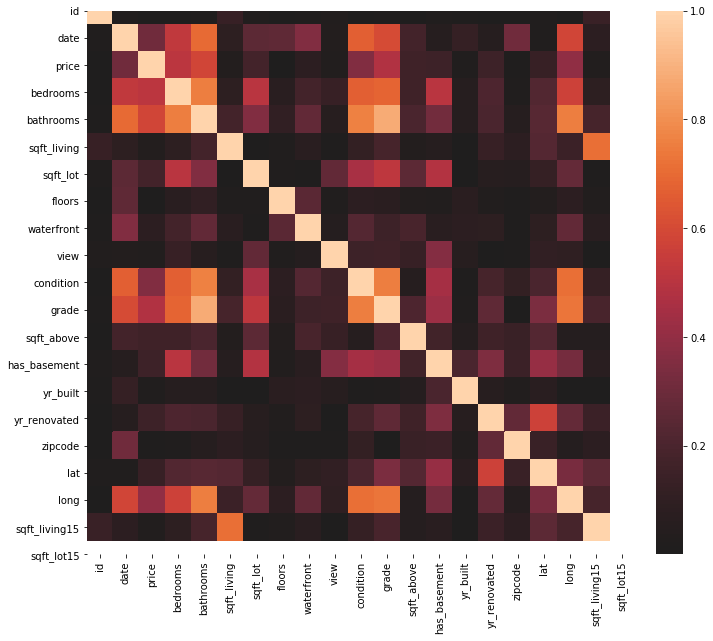

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [9]:
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

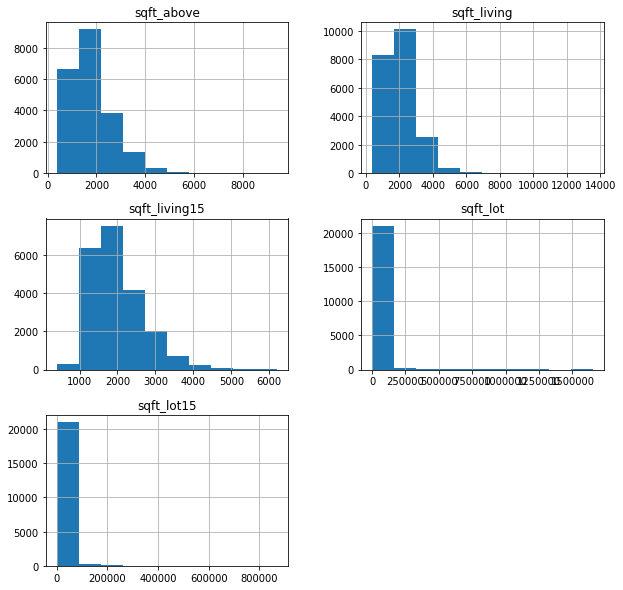

In [10]:
df[norm_candidates].hist(figsize=(10,10));

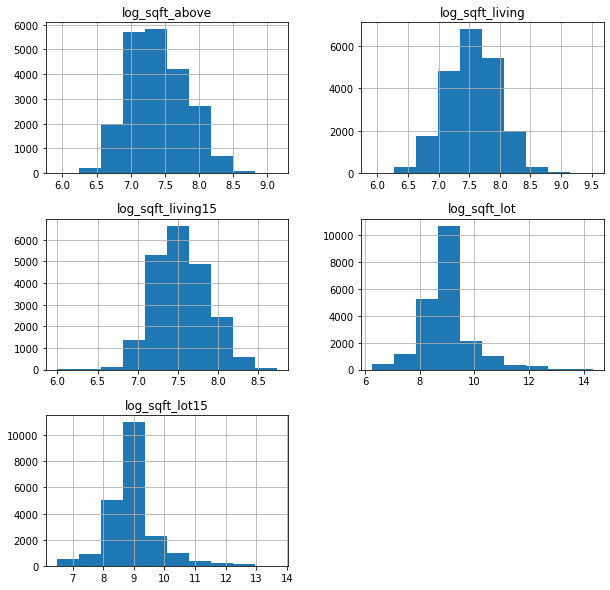

In [12]:
df_log = df.copy()

log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(10,10));



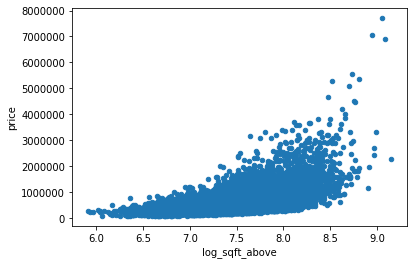

In [13]:
df_log.plot(kind = 'scatter', x = 'log_sqft_above', y = 'price')

In [14]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,has_basement,yr_built,yr_renovated,zipcode,lat,long,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,0,0,3,7,0,1955,0.0,98178,47.5112,-122.257,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0,0,3,7,1,1951,1991.0,98125,47.7210,-122.319,7.682482,7.851661,7.432484,8.887653,8.941022


In [58]:
with open('log_cleaned_df.pickle', 'wb') as f:
    pickle.dump(df_log, f)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
# X = data.drop([
#     'price','date','id','zipcode', 'floors',
#     'condition', 'grade', 'long', 'lat',
#     'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'log_sqft_living', 'log_sqft_above' ], axis = 1)
X = data.drop([
    'price','date','id'], axis = 1)


In [53]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
len(y_test)

4284

In [55]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 45133801195.03138
Test Mean Squarred Error: 48726857973.84776


In [56]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 212447.17271602224
Test Root Mean Squarred Error: 220741.6090678143


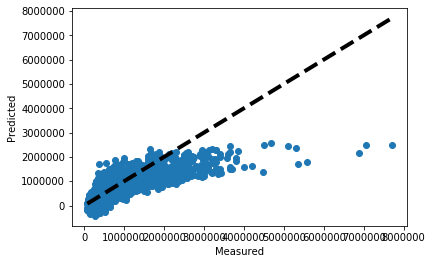

In [20]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

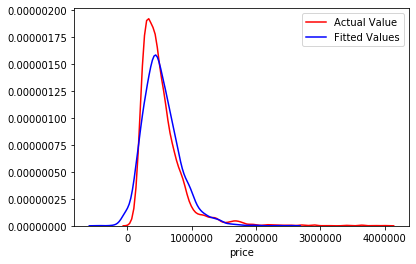

In [21]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [22]:
y_predicted = linreg.predict(X)

In [23]:
residuals = y - y_predicted

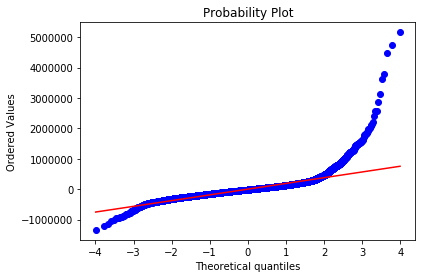

In [24]:
from scipy.stats import probplot

_ = probplot(residuals, plot=plt)

0.6984385474638651


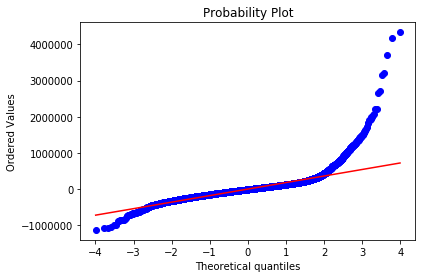

In [63]:
data1 = df.drop(['id', 'date'], axis = 1)
y1 = data1.price
data1 = data1.drop(['price'], axis = 1)
linreg1 = LinearRegression()
linreg1.fit(data1, y1)
print(linreg1.score(data1, y1))
y_predict = linreg1.predict(data1)
residuals1 = y - y_predict
_ = probplot(residuals1, plot=plt)